# Introduction to Scikit-Learn
[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/Danselem/brics_astro/blob/main/Week6/02_intro_sklearn.ipynb)

[Scikit-learn](https://scikit-learn.org/stable/) is a powerful and widely-used Python library that provides a comprehensive toolkit for performing machine learning tasks. It is built on top of other scientific Python libraries like NumPy and SciPy, and it is known for its clean, consistent, and well-documented interface.

For astronomers and scientists, scikit-learn is often the first and most important library to learn for machine learning. It provides efficient and easy-to-use tools for:

* Preprocessing Data: Preparing and cleaning data before training a model (e.g., scaling features, handling missing values).
* [Classification](https://scikit-learn.org/stable/supervised_learning.html): Algorithms to predict which category an object belongs to (e.g., Naive Bayes, Support Vector Machines, Random Forests).
* Regression: Algorithms to predict a continuous value (e.g., Linear Regression, Ridge Regression).
* [Clustering](https://scikit-learn.org/stable/modules/clustering.html): Algorithms to group unlabeled data (e.g., K-Means, DBSCAN).
* Model Selection and Evaluation: Tools to choose the best model and evaluate its performance.

One of the key strengths of scikit-learn is its consistent API (Application Programming Interface). Most algorithms share a simple and predictable set of methods:

* Initialize the model: `model = MyEstimator()`
* Train the model: `model.fit(X_train, y_train)`
* Make predictions: `predictions = model.predict(X_test)`
* Evaluate the model: `score = model.score(X_test, y_test)`

This consistency makes it easy to experiment with different algorithms for the same problem.

## The Concept of Training and Test Sets
A fundamental principle in machine learning is to never evaluate your model's performance on the same data it was trained on.

Why? A model can simply "memorize" the training data, including its noise and random quirks. If it does this, it will perform perfectly on that data but will fail to generalize to new, unseen data, which is the entire point of building a model. This problem is known as `overfitting`.

To properly evaluate a model's ability to generalize, we split our labeled dataset into two separate sets:
Training Set: This is the majority of the data (typically 70-80%). The model is shown both the features `(X_train)` and the corresponding correct labels `(y_train)` from this set. The model learns the patterns and relationships from this data only.
Test Set: This is the remaining portion of the data (typically 20-30%). The model has never seen this data during training. To evaluate the model, we give it the features from the test set `(X_test)` and ask it to make predictions. We then compare the model's predictions to the true labels `(y_test)`, which we held back. The performance on this test set gives us a realistic measure of how well the model will perform on new, real-world data.

Scikit-learn provides the train_test_split function, which is a convenient tool to perform this split randomly and reliably. By partitioning our data this way, we can build models and have confidence in their predicted performance.

## Loading an example dataset
scikit-learn comes with a few standard datasets, for instance the iris and digits datasets for classification and the boston house prices dataset for regression. Visit <https://scikit-learn.org/stable/datasets.html> to see all datasets available in scikit-learn.

In [41]:
from sklearn import datasets
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.model_selection import train_test_split
import joblib

In [42]:
iris = datasets.load_iris()
digits = datasets.load_digits()

A dataset is a dictionary-like object that holds all the data and some metadata about the data. This data is stored in the .data member, which is a n_samples, n_features array. In the case of supervised problem, explanatory variables are stored in the .target member. More details on the different datasets can be found in the dedicated section.

For instance, in the case of the digits dataset, digits.data gives access to the features that can be used to classify the digits samples:

In [43]:
digits.data 

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]], shape=(1797, 64))

and digits.target gives the ground truth for the digit dataset, that is the number corresponding to each digit image that we are trying to learn:

In [48]:
digits.target

array([0, 1, 2, ..., 8, 9, 8], shape=(1797,))

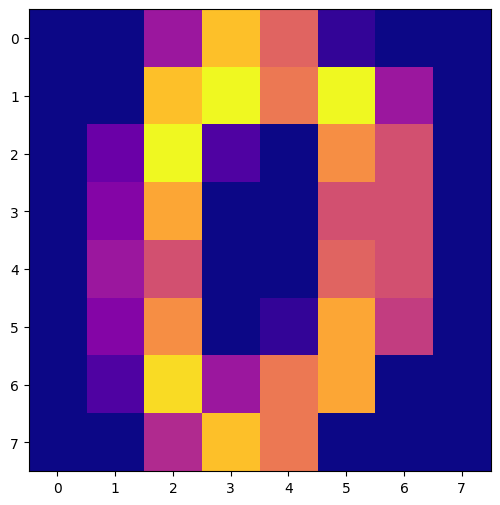

In [50]:
import matplotlib.pyplot as plt

#Display the first digit
plt.figure(1, figsize=(6, 6))
plt.imshow(digits.images[0], cmap=plt.cm.plasma)
plt.show()

## Shape of the data arrays

The data is always a 2D array, `n_samples`, `n_features`, although the original data may have had a different shape. In the case of the digits, each original sample is an image of shape 8, 8 and can be accessed using:

In [46]:
digits.images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

## Learning and Predicting
For the digits dataset, the task is to predict the value of a hand-written digit from an image. There are samples of 10 possible classes on which you can fit an estimator to predict the labels corresponding to new data.

In scikit-learn, an estimator is just a plain Python class that implements the methods `fit(X, Y)` and `predict(T)`.

An example of estimator is `sklearn.svm.SVC` that implements Support Vector Classification. For more on SVC, see the documentation at <https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html>. From the documentation, you can see there are many paramters that could be defined when calling the class. The constructor of an estimator takes as arguments the parameters of the model, but for the time being, we will consider the estimator as a black box:

In [51]:
clf = svm.SVC(gamma=0.001, C=100.)

clf.fit(digits.data[:-1], digits.target[:-1])

SVC(C=100.0, gamma=0.001)

In [52]:
clf.predict(digits.data[-1].reshape(1, -1))

array([8])

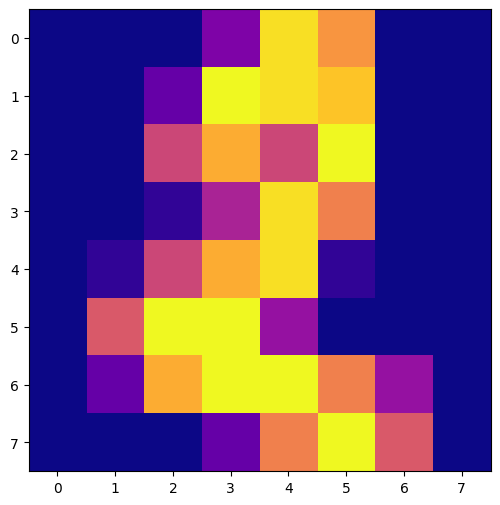

In [45]:
import matplotlib.pyplot as plt

#Display the first digit
plt.figure(1, figsize=(6, 6))
plt.imshow(digits.images[2], cmap=plt.cm.plasma)
plt.show()

In [14]:
# The features (sepal length/width, petal length/width) are in the .data attribute
X = iris.data

X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [15]:
# The labels (the species of flower) are in the .target attribute
y = iris.target

y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [53]:
print(f"Original dataset shape: {X.shape}")
print(f"Original labels shape: {y.shape}")
print(f"Feature names: {iris.feature_names}")
print(f"Target names (species): {iris.target_names}")

Original dataset shape: (150, 4)
Original labels shape: (150,)
Feature names: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Target names (species): ['setosa' 'versicolor' 'virginica']


In [54]:
# --- Split the Data ---

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42,
)

The train_test_split function shuffles and splits the data.
`test_size=0.2` means 20% of the data will be used for testing.
random_state=42 is a seed for the random number generator, ensuring the split is reproducible. Anyone who runs this code with the same random_state will get the exact same split.

In [55]:
# Check the shapes of the resulting sets
print(f"Shape of X_train (features for training): {X_train.shape}") # Should be 80% of 150
print(f"Shape of X_test (features for testing): {X_test.shape}")   # Should be 20% of 150
print(f"Shape of y_train (labels for training): {y_train.shape}")
print(f"Shape of y_test (labels for testing): {y_test.shape}")

Shape of X_train (features for training): (120, 4)
Shape of X_test (features for testing): (30, 4)
Shape of y_train (labels for training): (120,)
Shape of y_test (labels for testing): (30,)


Let's look at the example of using `K Nearest Neighbour` classifier. See <https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html> for more details.

We will tweak the paramters from the default ones.

In [56]:
# Initialize a model
knn = KNeighborsClassifier(n_neighbors=3, weights='distance', algorithm='kd_tree', p=1)
knn

KNeighborsClassifier(algorithm='kd_tree', n_neighbors=3, p=1,
                     weights='distance')

In [29]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='kd_tree', n_neighbors=3, p=1,
                     weights='distance')

In [31]:
# Make predictions
y_pred = knn.predict(X_test)

In [32]:
# Evaluate performance
accuracy = accuracy_score(y_test, y_pred)

print(f"Model Accuracy on the Test Set: {accuracy:.4f}")

Model Accuracy on the Test Set: 1.0000


Here, we have an accuracy of 100%. This is not usually the case for most machine learning projects. Anyways, we are dealing with a toy dataset and do not expect any difference. Let's look at other ways of evaluating the models

In [57]:
# For multi-class problems, precision/recall/f1 need an 'average' method
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
conf_matrix = confusion_matrix(y_test, y_pred)

In [36]:
print(f"Model Precision (weighted): {precision:.4f}")
print(f"Model Recall (weighted): {recall:.4f}")
print(f"Model F1 Score (weighted): {f1:.4f}")
print("\nConfusion Matrix:")
print(conf_matrix)

Model Precision (weighted): 1.0000
Model Recall (weighted): 1.0000
Model F1 Score (weighted): 1.0000

Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


## Saving the model
It is possible to save a model in the scikit by using Python frameworks like `joblib` and `pickle`

In [38]:
# Save the trained model to a file
model_filename = 'knn_iris_model.joblib'
joblib.dump(knn, model_filename)
print(f"\nModel saved to {model_filename}")


Model saved to knn_iris_model.joblib


In [40]:
# Load the model from the file
knn2 = joblib.load(model_filename)
print(f"Model loaded from {model_filename}")

# You can now use the loaded model to make new predictions
# Example: Predict for the first 5 samples in the test set using the loaded model
knn_predictions = knn2.predict(X_test[:5])
print(f"\nPredictions from loaded model for first 5 test samples: {knn_predictions}")
print(f"Actual labels for first 5 test samples: {y_test[:5]}")

Model loaded from knn_iris_model.joblib

Predictions from loaded model for first 5 test samples: [1 0 2 1 1]
Actual labels for first 5 test samples: [1 0 2 1 1]
